In [1]:
import numpy as np
from scipy import interpolate
from scipy import integrate, optimize
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
import csv
from copy import copy

2025-06-11 12:15:06.578320: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

micro_ = 1e3
with open('StefanovskiSameT.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    subjects = {}
    subj_id = 0
    i_row = 0
    for row in spamreader:
        if i_row > 0:
            if subj_id < int(row[0]):
                if subj_id > 0: subjects[subj_id] = np.array([copy(tim), copy(glu), copy(ins), copy(ffa)] )
                subj_id = int(row[0])
                tim, glu, ins, ffa = [], [], [], []
                print('Subject:',subj_id)
                tim.append(float(row[1]))
                glu.append(float(row[2]))
                ins.append(float(row[3]))
                ffa.append(micro_ * float(row[4]))
            elif subj_id > 0:
                tim.append(float(row[1]))
                glu.append(float(row[2]))
                ins.append(float(row[3]))
                ffa.append(micro_ * float(row[4]))
        i_row += 1
    subjects[subj_id] = np.array([copy(tim), copy(glu), copy(ins), copy(ffa)] )
    #print(len(subjects))
print(subjects[1][2])            
            
        

Subject: 1
Subject: 2
Subject: 3
Subject: 4
Subject: 5
Subject: 6
Subject: 7
Subject: 8
Subject: 9
Subject: 10
Subject: 11
Subject: 12
Subject: 13
Subject: 14
Subject: 15
Subject: 16
Subject: 17
Subject: 18
Subject: 19
Subject: 20
Subject: 21
Subject: 22
Subject: 23
Subject: 24
Subject: 25
[ 10.142  35.616  99.311  91.456  81.254  70.543  49.214  35.483  28.589
  26.281  20.873  21.633 305.678 244.155 137.74  187.36  124.105  71.961
  24.102  13.553  10.952   9.      9.35    9.177   9.058   8.11    9.766
  10.27 ]


In [11]:
print(subjects[1][3][0])  

286.0


40.18674076001079
3.37907302574964e+174
38.600535157179394
4.365099752288073e+167
43.44994014338098
5.019869568166847e+188
38.93288102596556
1.2115851501046168e+169
38.28578363753887
1.8751917828477033e+166
34.671265788250416
3.761786333942439e+150
30.48966218216428
2.5996830829598316e+132
33.04988768856239
3.418523003518342e+143
31.521315624285155
7.858404497228471e+136
28.14534100643381
1.7126274625396395e+122
23.153937083003612
3.599739676022909e+100
21.45670611029526
1.5321124271690348e+93
14.037088951306467
9.168593862218458e+60
16.694109370150716
3.173918695323019e+72
10.516894143514552
4.723793811717961e+45
0.5370223778227806
214.91095471630408
-1.1593572492616775
9.225192577767935e-06
-9.71483228109753
6.441981555676308e-43
-8.912092537714765
1.9736670312791362e-39
-12.453546505143542
8.221190787512372e-55
-13.678706890410902
3.9276319048912957e-60
-13.822956020806284
9.282495892539575e-61
-6.6416784693985385
1.4307274237083702e-29
-6.115242723973774
2.765911594130639e-27
-3.65

-101.03436518382236
0.0
-100.53504061060829
0.0
-100.45686500757637
0.0
-99.7238678229395
0.0
-99.57989799432426
0.0
-98.51885903323316
0.0
-99.71133252610088
0.0
-99.27084490274821
0.0
-97.28432982097091
0.0
-95.16418023431848
0.0
-95.82122251940272
0.0
-93.57636103707236
0.0
-93.80459504189812
0.0
-91.26338132378488
0.0
-91.09375705286959
0.0
-86.95134896673565
0.0
-86.44423911313086
0.0
-92.86006148458583
0.0
-97.9835246216958
0.0
-94.99382657251823
0.0
-91.59515399265038
0.0
-90.7737958811075
0.0
-88.31550944085716
0.0
-88.0988745400749
0.0
-88.38543200601383
0.0
-87.46305643646573
0.0
-90.42285738738723
0.0
-87.49266777111553
0.0
-86.20955785001406
0.0
-89.65608674130297
0.0
-87.4390019793816
0.0
-86.56603009280069
0.0
-88.91761479940263
0.0
-85.99615422068938
0.0
-89.13826792692491
0.0
-89.23702419519078
0.0
-87.8113383564665
0.0
-86.91877297537332
0.0
-87.3924884035247
0.0
-86.18608360127024
0.0
-88.22222523015817
0.0
-87.9824680166087
0.0
-88.23792433566852
0.0
-88.527488929297

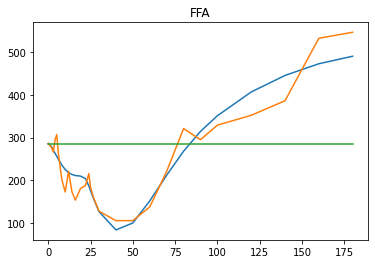

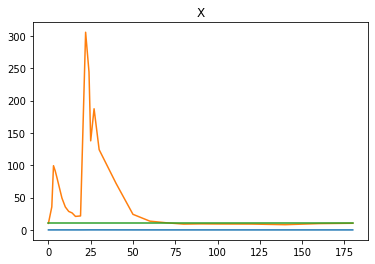

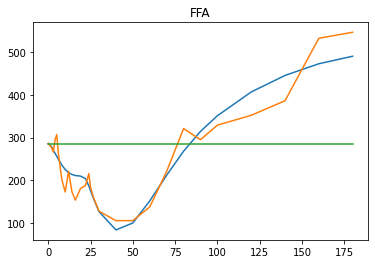

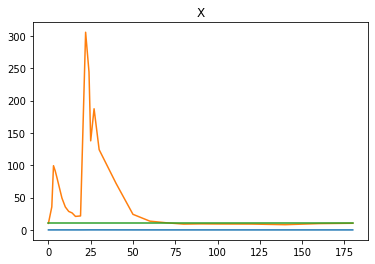

IndexError: list index out of range

In [3]:
def rhs_ffa(params,glu_, ins_, fb, ib):
    Sfal, Pxa,  Sffb,  PXFCR= params[0],params[1],params[2],params[3]#,params[4]
    def ffa_deriv(t0, gfxl):
        ffa_, xt_= gfxl[0], gfxl[1]    
        return ([-Sfal * glu_(t0) * ffa_  + Sffb - fb * xt_,
                 Pxa * (ins_(t0) - ib)- PXFCR * xt_])
    #thought:
#         return ([-Sfal * glu_(t0) * ffa_ + Sffb-xt_ * fb,
#              Pxa * (ins_(t0) - ib)- PXFCR * xt_])
    return (ffa_deriv)

def plot_subj(subj_id,params_):
    glu_ = (interpolate.interp1d(subjects[subj_id][0], subjects[subj_id][1], kind = 'linear',\
                                        fill_value = "extrapolate"))
    ins_ = (interpolate.interp1d(subjects[subj_id][0], subjects[subj_id][2], kind = 'linear',\
                                            fill_value = "extrapolate"))
    time_pts_used = subjects[subj_id][0,:] > -1
    glu_0, ins_0, ffa_0 = subjects[subj_id][1,0], subjects[subj_id][2,0], \
                            subjects[subj_id][3,0]
    params = np.abs(params_)
#     xt_22 = params[4]    
    x_init = np.array([subjects[subj_id][3,0], 0])
    ffa_deriv = rhs_ffa(params,glu_, ins_, ffa_0, ins_0)
    Z = integrate.solve_ivp(ffa_deriv, [subjects[subj_id][0,0],subjects[subj_id][0,-1]], x_init, \
                                           t_eval = subjects[subj_id][0],\
                            atol = 1e-12,rtol = 1e-12).y
    ffa_int, xt_int= Z[0], Z[1]
    var_ = ['FFA', 'X']
    
    plt.plot(subjects[subj_id][0],Z[0])
    plt.plot(subjects[subj_id][0],subjects[subj_id][3])
    plt.plot(subjects[subj_id][0],ffa_0 * np.ones(subjects[subj_id][0].size))
    plt.title(var_[0])
    plt.show()
    plt.close()

    plt.plot(subjects[subj_id][0],Z[1])
    plt.plot(subjects[subj_id][0],subjects[subj_id][2])
    plt.plot(subjects[subj_id][0],ins_0 * np.ones(subjects[subj_id][0].size))
    plt.title(var_[1])
    plt.show()
    plt.close()




def optimize_subj(subj_id):
    glu_ = (interpolate.interp1d(subjects[subj_id][0], subjects[subj_id][1], kind = 'linear',\
                                        fill_value = "extrapolate"))
    ins_ = (interpolate.interp1d(subjects[subj_id][0], subjects[subj_id][2], kind = 'linear',\
                                            fill_value = "extrapolate"))

#     time_pts_used = subjects[subj_id][0,:] > 20
    glu_0, ins_0, ffa_0 = subjects[subj_id][1,0], subjects[subj_id][2,0], \
                            subjects[subj_id][3,0]
    #norm_glu = np.mean(((subjects[subj_id][1,time_pts_used][:-1] - subjects[subj_id][1,time_pts_used][1:]) ** 2)/(subjects[subj_id][0,time_pts_used][1:]))
#     time_pts_optm = subjects[subj_id][0,:] >-1   #> 20
#     norm_ffa = np.mean(((subjects[subj_id][3,time_pts_optm ][:-1] - subjects[subj_id][3,time_pts_optm ][1:]) ** 2)/
#                        (subjects[subj_id][0,time_pts_optm ][1:]))
#     norm_ffa = np.mean(np.sum((subjects[subj_id][3,time_pts_used]) ** 2))
    time_pts_used = subjects[subj_id][0,:] > 0#20

    
    norm_ffa = np.mean((subjects[subj_id][3,time_pts_used][:-1] - subjects[subj_id][3,time_pts_used][1:]) ** 2)#/(subjects[subj_id][0,time_pts_used][1:]))

    
    start_par = np.array([0.002,   0.000034,   0.02*ffa_0,   0.06])    #1.2e-4,.05,.03,11.25 ,0.08,42.9,18])
                          #Sfal,      Pxa     ,Sffb,   PXFCR 

    def cost_(params_):
        params = np.abs(params_)
#         xt_22 = params[4]
        x_init = np.array([subjects[subj_id][3,0], 0])
        ffa_deriv = rhs_ffa(params, glu_, ins_, ffa_0, ins_0)
        Z = integrate.solve_ivp(ffa_deriv, [subjects[subj_id][0,0], subjects[subj_id][0,-1]], x_init, \
                                               t_eval = subjects[subj_id][0],\
                                method = 'LSODA', atol = 1e-12,rtol = 1e-12).y
        ffa_int = Z[0,1:]
        mf=-min(ffa_int)
        penalty = np.exp(10*mf)
        print(mf)
        print(penalty)
#         tvec=subjects[subj_id][0]
#         tvec[0]=1
#         cost =  np.mean(((ffa_int - subjects[subj_id][3]) ** 2)/tvec)/norm_ffa
        cost =  penalty+ np.mean((ffa_int - subjects[subj_id][3,time_pts_used]) ** 2/norm_ffa)#(subjects[subj_id][0,time_pts_used]))/
        return cost
    results = optimize.minimize(cost_,start_par,method='Nelder-Mead')
    results.x = np.abs(results.x)
    print(subj_id,results.fun,results.x)
    plot_subj(subj_id,results.x)
    return results
                        
    
subject_params = [optimize_subj(i) for i in range (1,2)]#subjects.keys()]
for i,subj_id in enumerate(list(subjects.keys())):
    plot_subj(subj_id,subject_params[i].x)
#     print((subject_params[i].x-start_par)/start_par)                       
    
paraoptmGFX = np.array([subject_params[i].x for i in range(1,2)])

print(paraoptmGFX)
# np.savetxt('paraoptmFX2D.csv', paraoptmGFX, delimiter=',')




In [10]:
print(paraoptmGFX)

NameError: name 'paraoptmGFX' is not defined

Iter   1 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.8000e-03 3.5275e-05 5.9345e+00 6.2250e-02 2.8600e+02]
Iter   2 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.8000e-03 3.5275e-05 5.9345e+00 6.2250e-02 2.8600e+02]
Iter   3 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.8000e-03 3.5275e-05 5.9345e+00 6.2250e-02 2.8600e+02]
Iter   4 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.66250000e-03 3.42390625e-05 6.56459375e+00 6.06093750e-02
 2.86000000e+02]
Iter   5 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.40937500e-03 3.44183594e-05 6.41153906e+00 6.70664063e-02
 2.86000000e+02]
Iter   6 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.40937500e-03 3.44183594e-05 6.41153906e+00 6.70664063e-02
 2.86000000e+02]
Iter   7 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.04960937e-03 3.67981934e-05 6.89179004e+00 6.27993164e-02
 2.86000000e+02]
Iter   8 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [5.86816406e-04 3.56030884e-05 7.93150757e+00 6.65863037e-02
 2.86000000e+02]
Iter   9 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [5.86816406e-04 3.56030884e-05 7.93150757e+00 6.65863037e-02
 2.86000000e+02]
Iter  10 → [Sfal,Px

Iter  73 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [2.08013756e-04 3.37527355e-05 9.95740154e+00 9.76894138e-02
 2.86000000e+02]
Iter  74 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [2.08013756e-04 3.37527355e-05 9.95740154e+00 9.76894138e-02
 2.86000000e+02]
Iter  75 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [2.08013756e-04 3.37527355e-05 9.95740154e+00 9.76894138e-02
 2.86000000e+02]
Iter  76 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [2.26359773e-04 3.87732957e-05 1.11542770e+01 9.70239171e-02
 2.86000000e+02]
Iter  77 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [2.16118167e-04 3.47231982e-05 1.02747778e+01 9.94485880e-02
 2.86000000e+02]
Iter  78 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [2.31208196e-04 3.75060596e-05 1.09966009e+01 9.84185323e-02
 2.86000000e+02]
Iter  79 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [2.10528503e-04 3.35524300e-05 9.79434187e+00 9.67895430e-02
 2.86000000e+02]
Iter  80 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [2.10528503e-04 3.35524300e-05 9.79434187e+00 9.67895430e-02
 2.86000000e+02]
Iter  81 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [2.10528503e-04 3.35524300e-05 9.7

Iter 144 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.84955489e-04 6.35181721e-05 9.11005188e+00 1.80346266e-01
 2.86000000e+02]
Iter 145 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.92230845e-04 6.38462466e-05 9.45484267e+00 1.78735419e-01
 2.86000000e+02]
Iter 146 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.92230845e-04 6.38462466e-05 9.45484267e+00 1.78735419e-01
 2.86000000e+02]
Iter 147 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.90572457e-04 5.87388206e-05 9.36428445e+00 1.65233189e-01
 2.86000000e+02]
Iter 148 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.87498542e-04 6.48572219e-05 9.29849975e+00 1.82501313e-01
 2.86000000e+02]
Iter 149 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.87498542e-04 6.48572219e-05 9.29849975e+00 1.82501313e-01
 2.86000000e+02]
Iter 150 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.85131523e-04 6.43028221e-05 9.11488221e+00 1.84326865e-01
 2.86000000e+02]
Iter 151 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.85131523e-04 6.43028221e-05 9.11488221e+00 1.84326865e-01
 2.86000000e+02]
Iter 152 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.85131523e-04 6.43028221e-05 9.1

Iter 215 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.81669643e-04 6.65415868e-05 8.80159666e+00 2.07467610e-01
 2.86000000e+02]
Iter 216 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.81669948e-04 6.65469690e-05 8.80104464e+00 2.07510072e-01
 2.86000000e+02]
Iter 217 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.81682935e-04 6.65459083e-05 8.80192353e+00 2.07478429e-01
 2.86000000e+02]
Iter 218 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.81682515e-04 6.65307524e-05 8.80164479e+00 2.07437683e-01
 2.86000000e+02]
Iter 219 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.81691261e-04 6.65280008e-05 8.80211200e+00 2.07430930e-01
 2.86000000e+02]
Iter 220 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.81691261e-04 6.65280008e-05 8.80211200e+00 2.07430930e-01
 2.86000000e+02]
Iter 221 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.81676520e-04 6.65415356e-05 8.80143723e+00 2.07481659e-01
 2.86000000e+02]
Iter 222 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.81680763e-04 6.65295594e-05 8.80160060e+00 2.07441867e-01
 2.86000000e+02]
Iter 223 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.81681782e-04 6.65327316e-05 8.8

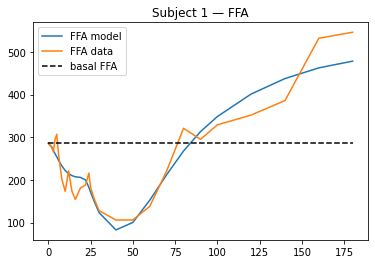

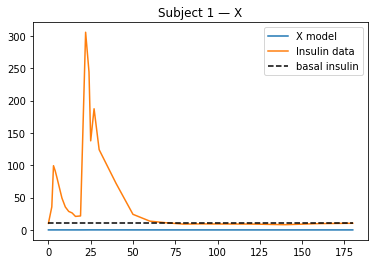

Iter   1 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.8000e-03 3.5275e-05 9.8355e+00 6.2250e-02 4.7400e+02]
Iter   2 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.8000e-03 3.5275e-05 9.8355e+00 6.2250e-02 4.7400e+02]
Iter   3 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.8000e-03 3.5275e-05 9.8355e+00 6.2250e-02 4.7400e+02]
Iter   4 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.66250000e-03 3.42390625e-05 1.08797813e+01 6.06093750e-02
 4.74000000e+02]
Iter   5 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.40937500e-03 3.44183594e-05 1.06261172e+01 6.70664063e-02
 4.74000000e+02]
Iter   6 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.40937500e-03 3.44183594e-05 1.06261172e+01 6.70664063e-02
 4.74000000e+02]
Iter   7 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.04960937e-03 3.67981934e-05 1.14220576e+01 6.27993164e-02
 4.74000000e+02]
Iter   8 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [5.86816406e-04 3.56030884e-05 1.31452258e+01 6.65863037e-02
 4.74000000e+02]
Iter   9 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [5.86816406e-04 3.56030884e-05 1.31452258e+01 6.65863037e-02
 4.74000000e+02]
Iter  10 → [Sfal,Px

Iter  73 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.50291784e-04 4.85589251e-05 1.57392462e+01 6.48268739e-02
 4.74000000e+02]
Iter  74 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.54399377e-04 5.07031894e-05 1.61161011e+01 6.78601946e-02
 4.74000000e+02]
Iter  75 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.54399377e-04 5.07031894e-05 1.61161011e+01 6.78601946e-02
 4.74000000e+02]
Iter  76 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.54399377e-04 5.07031894e-05 1.61161011e+01 6.78601946e-02
 4.74000000e+02]
Iter  77 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.57625079e-04 5.28020918e-05 1.65704012e+01 7.06664101e-02
 4.74000000e+02]
Iter  78 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.58424492e-04 5.56721591e-05 1.69897215e+01 7.53295858e-02
 4.74000000e+02]
Iter  79 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.60718910e-04 6.06674510e-05 1.77859563e+01 7.54501254e-02
 4.74000000e+02]
Iter  80 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.67273100e-04 5.83901426e-05 1.75840523e+01 7.75160685e-02
 4.74000000e+02]
Iter  81 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [1.67273100e-04 5.83901426e-05 1.7

Iter 144 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [8.47493329e-05 1.09055341e-04 1.19105538e+01 1.74632497e-01
 4.74000000e+02]
Iter 145 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [7.87002584e-05 1.09262657e-04 1.12790739e+01 1.77888609e-01
 4.74000000e+02]
Iter 146 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [7.87002584e-05 1.09262657e-04 1.12790739e+01 1.77888609e-01
 4.74000000e+02]
Iter 147 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [7.87002584e-05 1.09262657e-04 1.12790739e+01 1.77888609e-01
 4.74000000e+02]
Iter 148 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [7.98777876e-05 1.13623709e-04 1.14004419e+01 1.85258726e-01
 4.74000000e+02]
Iter 149 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [7.98777876e-05 1.13623709e-04 1.14004419e+01 1.85258726e-01
 4.74000000e+02]
Iter 150 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [7.25930687e-05 1.15902822e-04 1.08632587e+01 1.92595368e-01
 4.74000000e+02]
Iter 151 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [7.25930687e-05 1.15902822e-04 1.08632587e+01 1.92595368e-01
 4.74000000e+02]
Iter 152 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [7.25930687e-05 1.15902822e-04 1.0

Iter 215 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [6.93423401e-05 1.18192494e-04 9.92547325e+00 2.20543244e-01
 4.74000000e+02]
Iter 216 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [6.93423401e-05 1.18192494e-04 9.92547325e+00 2.20543244e-01
 4.74000000e+02]
Iter 217 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [6.93423401e-05 1.18192494e-04 9.92547325e+00 2.20543244e-01
 4.74000000e+02]
Iter 218 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [6.93423401e-05 1.18192494e-04 9.92547325e+00 2.20543244e-01
 4.74000000e+02]
Iter 219 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [6.93423401e-05 1.18192494e-04 9.92547325e+00 2.20543244e-01
 4.74000000e+02]
Iter 220 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [6.93714704e-05 1.18111641e-04 9.91355926e+00 2.20745921e-01
 4.74000000e+02]
Iter 221 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [6.94105382e-05 1.18044311e-04 9.91760986e+00 2.20532884e-01
 4.74000000e+02]
Iter 222 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [6.94105382e-05 1.18044311e-04 9.91760986e+00 2.20532884e-01
 4.74000000e+02]
Iter 223 → [Sfal,Pxa,Sffb,PXFCR,Fb] = [6.92881349e-05 1.18057510e-04 9.9

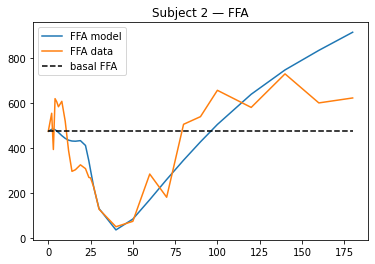

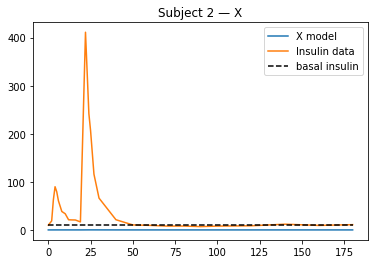


Final parameter matrix (n×5):
 [[1.81682774e-04 6.65348290e-05 8.80177714e+00 2.07452515e-01
  2.86000000e+02]
 [6.93578172e-05 1.18134555e-04 9.91916304e+00 2.20658591e-01
  4.74000000e+02]]
Saved parameters to paraoptmFX2D.csv


In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate, integrate, optimize

micro_ = 1e3

def load_subjects(csv_path='StefanovskiSameT.csv'):
    """
    Read CSV and return dict: subject_id → array([times, glu, ins, ffa]).
    """
    subjects = {}
    subj_id = 0
    tim = glu = ins = ffa = None

    with open(csv_path, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for i_row, row in enumerate(reader):
            if i_row == 0:
                continue
            sid = int(row[0])
            if sid != subj_id:
                if subj_id > 0:
                    subjects[subj_id] = np.array([
                        tim.copy(), glu.copy(), ins.copy(), ffa.copy()
                    ])
                subj_id = sid
                tim, glu, ins, ffa = [], [], [], []
            tim.append(float(row[1]))
            glu.append(float(row[2]))
            ins.append(float(row[3]))
            ffa.append(micro_ * float(row[4]))
        if subj_id > 0:
            subjects[subj_id] = np.array([
                tim.copy(), glu.copy(), ins.copy(), ffa.copy()
            ])

    return subjects

def rhs_ffa(params, glu_, ins_, fb, ib):
    """
    Returns the derivative function [dFFA/dt, dX/dt]
    for given params = [Sfal, Pxa, Sffb, PXFCR].
    """
    Sfal, Pxa, Sffb, PXFCR = params

    def deriv(t0, y):
        ffa_, x_ = y
        return [
            -Sfal * glu_(t0) * ffa_ + Sffb - fb * x_,
             Pxa  * (ins_(t0) - ib)    - PXFCR * x_
        ]

    return deriv

def plot_subj(subj_id, params, subjects):
    """
    Plot model vs. data for FFA and X for one subject.
    """
    t, glu, ins, ffa = subjects[subj_id]
    glu_ = interpolate.interp1d(t, glu, kind='linear', fill_value="extrapolate")
    ins_ = interpolate.interp1d(t, ins, kind='linear', fill_value="extrapolate")
    ffa0, ins0 = ffa[0], ins[0]

    sol = integrate.solve_ivp(
        rhs_ffa(np.abs(params), glu_, ins_, ffa0, ins0),
        [t[0], t[-1]],
        [ffa0, 0.0],
        t_eval=t,
        method='LSODA',
        atol=1e-12,
        rtol=1e-12
    ).y

    # FFA plot
    plt.figure()
    plt.plot(t, sol[0], label='FFA model')
    plt.plot(t, ffa,    label='FFA data')
    plt.hlines(ffa0, t[0], t[-1], 'k', ls='--', label='basal FFA')
    plt.title(f'Subject {subj_id} — FFA')
    plt.legend()
    plt.show()

    # X plot
    plt.figure()
    plt.plot(t, sol[1], label='X model')
    plt.plot(t, ins,    label='Insulin data')
    plt.hlines(ins0, t[0], t[-1], 'k', ls='--', label='basal insulin')
    plt.title(f'Subject {subj_id} — X')
    plt.legend()
    plt.show()

def optimize_subj(subj_id, subjects):
    """
    Optimize [Sfal, Pxa, Sffb, PXFCR] with Nelder–Mead,
    printing [Sfal, Pxa, Sffb, PXFCR, basal_FFA] each iteration.
    """
    t, glu, ins, ffa = subjects[subj_id]
    glu_ = interpolate.interp1d(t, glu, kind='linear', fill_value="extrapolate")
    ins_ = interpolate.interp1d(t, ins, kind='linear', fill_value="extrapolate")
    ffa0, ins0 = ffa[0], ins[0]
    mask = t > 0
    norm_ffa = np.mean((np.diff(ffa[mask])**2) / t[mask][1:])
    start = np.array([0.002, 0.000034, 0.02 * ffa0, 0.06])

    def cost(p):
        sol = integrate.solve_ivp(
            rhs_ffa(np.abs(p), glu_, ins_, ffa0, ins0),
            [t[0], t[-1]],
            [ffa0, 0.0],
            t_eval=t,
            method='LSODA',
            atol=1e-12,
            rtol=1e-12
        ).y[0][mask]
        return np.mean((sol - ffa[mask])**2 / t[mask]) / norm_ffa

    # Callback prints the 5-vector at each iteration
    def iter_cb(xk):
        params5 = np.append(np.abs(xk), ffa0)
        print(f"Iter {iter_cb.count:3d} → [Sfal,Pxa,Sffb,PXFCR,Fb] = {params5}")
        iter_cb.count += 1
    iter_cb.count = 1

    res = optimize.minimize(
        cost,
        start,
        method='Nelder-Mead',
        callback=iter_cb,
        options={'maxiter': 500, 'disp': False}
    )
    res.x = np.abs(res.x)
    return res

def run_optimization(subject_ids, subjects, save_path='paraoptmFX2D.csv'):
    """
    For each subject_id:
      1) optimize_subj (prints iterations),
      2) plot_subj,
      3) collect [params, basal_FFA].
    Finally stack into (n×5) and save.
    """
    results = []
    for sid in subject_ids:
        if sid not in subjects:
            print(f"Subject {sid} not in data; skipping.")
            continue
        res = optimize_subj(sid, subjects)
        plot_subj(sid, res.x, subjects)
        results.append((res.x, subjects[sid][3, 0]))

    paraoptm = np.vstack([
        np.append(p, b) for p, b in results
    ])
    print("\nFinal parameter matrix (n×5):\n", paraoptm)
    np.savetxt(save_path, paraoptm, delimiter=',')
    print(f"Saved parameters to {save_path}")
    return paraoptm

# -----------------------------------
# Example Jupyter usage:
# -----------------------------------

# 1) Load data
subjects = load_subjects('StefanovskiSameT.csv')

# 2) Optimize only subjects 1 & 2
para_1_2 = run_optimization([1, 2], subjects)

# # 3) Optimize all subjects (e.g. 1–25)
# all_ids   = sorted(subjects.keys())
# para_all  = run_optimization(all_ids, subjects)


  mf=4.019e+01, penalty=3.379e+174
  mf=3.860e+01, penalty=4.365e+167
  mf=4.345e+01, penalty=5.020e+188
  mf=3.893e+01, penalty=1.212e+169
  mf=3.829e+01, penalty=1.875e+166
  mf=3.467e+01, penalty=3.762e+150
  mf=3.049e+01, penalty=2.600e+132
Iter   1 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.0750e-03 3.0600e-05 5.9345e+00 6.2250e-02 2.8600e+02]
  mf=3.305e+01, penalty=3.419e+143
Iter   2 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.0750e-03 3.0600e-05 5.9345e+00 6.2250e-02 2.8600e+02]
  mf=3.152e+01, penalty=7.858e+136
Iter   3 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.0750e-03 3.0600e-05 5.9345e+00 6.2250e-02 2.8600e+02]
  mf=2.815e+01, penalty=1.713e+122
  mf=2.315e+01, penalty=3.600e+100
Iter   4 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.02031250e-03 2.82625000e-05 6.02834375e+00 6.88593750e-02
 2.86000000e+02]
  mf=2.146e+01, penalty=1.532e+93
  mf=1.404e+01, penalty=9.169e+60
Iter   5 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.23554687e-03 2.39593750e-05 6.25960156e+00 6.72539

  mf=-1.503e+02, penalty=0.000e+00
  mf=-1.583e+02, penalty=0.000e+00
Iter  44 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [3.76880384e-04 2.83238318e-05 1.48257746e+01 1.22722512e-01
 2.86000000e+02]
  mf=-1.279e+02, penalty=0.000e+00
Iter  45 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [3.76880384e-04 2.83238318e-05 1.48257746e+01 1.22722512e-01
 2.86000000e+02]
  mf=-1.364e+02, penalty=0.000e+00
  mf=-1.305e+02, penalty=0.000e+00
Iter  46 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [3.89709154e-04 4.13038073e-05 1.59297482e+01 1.32527964e-01
 2.86000000e+02]
  mf=-1.194e+02, penalty=0.000e+00
  mf=-1.042e+02, penalty=0.000e+00
Iter  47 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [4.26432191e-04 5.21527899e-05 1.67746789e+01 1.40989510e-01
 2.86000000e+02]
  mf=-1.249e+02, penalty=0.000e+00
Iter  48 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [4.26432191e-04 5.21527899e-05 1.67746789e+01 1.40989510e-01
 2.86000000e+02]
  mf=-1.273e+02, penalty=0.000e+00
  mf=-1.286e+02, penalty=0.000e+00
Iter  49 → [Sfa

  mf=-1.009e+02, penalty=0.000e+00
Iter  89 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [3.51860578e-04 5.40608840e-05 1.55553215e+01 1.28847142e-01
 2.86000000e+02]
  mf=-9.390e+01, penalty=0.000e+00
  mf=-8.946e+01, penalty=0.000e+00
Iter  90 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.94407092e-04 5.11386289e-05 1.43308840e+01 1.14413798e-01
 2.86000000e+02]
  mf=-1.035e+02, penalty=0.000e+00
Iter  91 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.94407092e-04 5.11386289e-05 1.43308840e+01 1.14413798e-01
 2.86000000e+02]
  mf=-8.420e+01, penalty=0.000e+00
Iter  92 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.94407092e-04 5.11386289e-05 1.43308840e+01 1.14413798e-01
 2.86000000e+02]
  mf=-8.243e+01, penalty=0.000e+00
  mf=-7.251e+01, penalty=1.297e-315
Iter  93 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.51646460e-04 5.25618379e-05 1.33008523e+01 1.04939814e-01
 2.86000000e+02]
  mf=-8.577e+01, penalty=0.000e+00
  mf=-8.944e+01, penalty=0.000e+00
Iter  94 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = 

  mf=-1.022e+02, penalty=0.000e+00
  mf=-1.011e+02, penalty=0.000e+00
Iter 133 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.36645558e-04 3.36321814e-05 1.12206254e+01 8.30072227e-02
 2.86000000e+02]
  mf=-1.011e+02, penalty=0.000e+00
Iter 134 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.36645558e-04 3.36321814e-05 1.12206254e+01 8.30072227e-02
 2.86000000e+02]
  mf=-1.019e+02, penalty=0.000e+00
  mf=-1.025e+02, penalty=0.000e+00
Iter 135 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.35916134e-04 3.33848641e-05 1.11933584e+01 8.27296151e-02
 2.86000000e+02]
  mf=-1.021e+02, penalty=0.000e+00
  mf=-1.013e+02, penalty=0.000e+00
Iter 136 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.36241999e-04 3.35937588e-05 1.12155376e+01 8.29368034e-02
 2.86000000e+02]
  mf=-1.011e+02, penalty=0.000e+00
  mf=-1.016e+02, penalty=0.000e+00
Iter 137 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.36241999e-04 3.35937588e-05 1.12155376e+01 8.29368034e-02
 2.86000000e+02]
  mf=-1.014e+02, penalty=0.000e+00
  mf=-1.014e+02

  mf=-1.010e+02, penalty=0.000e+00
  mf=-1.005e+02, penalty=0.000e+00
Iter 177 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.32505011e-04 3.48396523e-05 1.10239703e+01 8.88286435e-02
 2.86000000e+02]
  mf=-1.005e+02, penalty=0.000e+00
  mf=-9.972e+01, penalty=0.000e+00
Iter 178 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.31476095e-04 3.50486938e-05 1.09207584e+01 9.02844741e-02
 2.86000000e+02]
  mf=-9.958e+01, penalty=0.000e+00
  mf=-9.852e+01, penalty=0.000e+00
Iter 179 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.29314109e-04 3.59253817e-05 1.08961752e+01 9.22462830e-02
 2.86000000e+02]
  mf=-9.971e+01, penalty=0.000e+00
  mf=-9.927e+01, penalty=0.000e+00
Iter 180 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.24247920e-04 3.67245743e-05 1.06347787e+01 9.80516331e-02
 2.86000000e+02]
  mf=-9.728e+01, penalty=0.000e+00
  mf=-9.516e+01, penalty=0.000e+00
Iter 181 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.23370347e-04 3.85722309e-05 1.05825397e+01 1.02636271e-01
 2.86000000e+02]
  mf=-9.582e+01

  mf=-8.790e+01, penalty=0.000e+00
  mf=-8.802e+01, penalty=0.000e+00
Iter 222 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [1.75321689e-04 6.31082079e-05 8.73515983e+00 1.97111423e-01
 2.86000000e+02]
  mf=-8.709e+01, penalty=0.000e+00
  mf=-8.641e+01, penalty=0.000e+00
Iter 223 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [1.73536563e-04 6.42602379e-05 8.71485949e+00 1.98727860e-01
 2.86000000e+02]
  mf=-8.688e+01, penalty=0.000e+00
Iter 224 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [1.73536563e-04 6.42602379e-05 8.71485949e+00 1.98727860e-01
 2.86000000e+02]
  mf=-8.635e+01, penalty=0.000e+00
Iter 225 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [1.73536563e-04 6.42602379e-05 8.71485949e+00 1.98727860e-01
 2.86000000e+02]
  mf=-8.624e+01, penalty=0.000e+00
Iter 226 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [1.73536563e-04 6.42602379e-05 8.71485949e+00 1.98727860e-01
 2.86000000e+02]
  mf=-8.523e+01, penalty=0.000e+00
  mf=-8.407e+01, penalty=0.000e+00
Iter 227 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [

  mf=-8.433e+01, penalty=0.000e+00
  mf=-8.433e+01, penalty=0.000e+00
Iter 266 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [1.73855024e-04 6.68429184e-05 8.72340264e+00 2.05646181e-01
 2.86000000e+02]
  mf=-8.430e+01, penalty=0.000e+00
  mf=-8.434e+01, penalty=0.000e+00
Iter 267 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [1.73859540e-04 6.68193981e-05 8.72330592e+00 2.05577412e-01
 2.86000000e+02]
  mf=-8.435e+01, penalty=0.000e+00
  mf=-8.432e+01, penalty=0.000e+00
Iter 268 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [1.73860913e-04 6.68339183e-05 8.72330643e+00 2.05613553e-01
 2.86000000e+02]
  mf=-8.433e+01, penalty=0.000e+00
  mf=-8.433e+01, penalty=0.000e+00
Iter 269 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [1.73860913e-04 6.68339183e-05 8.72330643e+00 2.05613553e-01
 2.86000000e+02]
  mf=-8.433e+01, penalty=0.000e+00
  mf=-8.433e+01, penalty=0.000e+00
Iter 270 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [1.73860913e-04 6.68339183e-05 8.72330643e+00 2.05613553e-01
 2.86000000e+02]
  mf=-8.433e+01

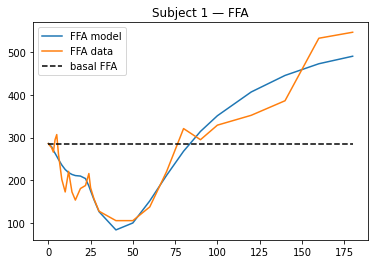

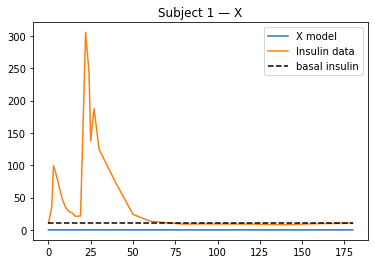

  mf=7.041e+01, penalty=6.176e+305
  mf=6.768e+01, penalty=8.399e+293


/var/folders/2b/j4_0xvfd2yn858rh_853wd8h9f4j83/T/ipykernel_7675/3068305576.py:122: RuntimeWarning: overflow encountered in exp
  penalty = np.exp(10 * mf)


  mf=7.699e+01, penalty=inf
  mf=6.736e+01, penalty=3.377e+292
  mf=6.628e+01, penalty=6.882e+287
  mf=5.912e+01, penalty=5.678e+256
  mf=5.060e+01, penalty=5.683e+219
Iter   1 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.0750e-03 3.0600e-05 9.8355e+00 6.2250e-02 4.7400e+02]
  mf=5.571e+01, penalty=8.822e+241
Iter   2 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.0750e-03 3.0600e-05 9.8355e+00 6.2250e-02 4.7400e+02]
  mf=5.196e+01, penalty=4.539e+225
Iter   3 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.0750e-03 3.0600e-05 9.8355e+00 6.2250e-02 4.7400e+02]
  mf=4.573e+01, penalty=3.823e+198
  mf=3.616e+01, penalty=1.152e+157
Iter   4 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.10781250e-03 2.82625000e-05 9.57628125e+00 6.88593750e-02
 4.74000000e+02]
  mf=3.166e+01, penalty=3.088e+137
  mf=1.695e+01, penalty=4.069e+73
Iter   5 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.18867187e-03 2.39593750e-05 1.05964922e+01 6.72539062e-02
 4.74000000e+02]
  mf=2.145e+01, penalty=1.477e+93
Iter   6 → [Sfal,

  mf=-2.353e+02, penalty=0.000e+00
  mf=-1.914e+02, penalty=0.000e+00
Iter  45 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [5.03749579e-04 2.70957470e-05 3.13615987e+01 1.81399423e-02
 4.74000000e+02]
  mf=-3.321e+02, penalty=0.000e+00
Iter  46 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [5.03749579e-04 2.70957470e-05 3.13615987e+01 1.81399423e-02
 4.74000000e+02]
  mf=-2.748e+02, penalty=0.000e+00
  mf=-2.543e+02, penalty=0.000e+00
Iter  47 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [3.72834758e-04 2.78487955e-05 3.30886536e+01 1.31207180e-02
 4.74000000e+02]
  mf=-1.667e+02, penalty=0.000e+00
Iter  48 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [3.72834758e-04 2.78487955e-05 3.30886536e+01 1.31207180e-02
 4.74000000e+02]
  mf=-2.315e+02, penalty=0.000e+00
  mf=-2.347e+02, penalty=0.000e+00
Iter  49 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [3.42046602e-04 3.18844443e-05 3.12842658e+01 1.94505274e-02
 4.74000000e+02]
  mf=-5.995e+01, penalty=4.176e-261
  mf=-1.371e+02, penalty=0.000e+00
Iter  50 → [Sf

  mf=-7.340e+01, penalty=1.675e-319
  mf=-8.360e+01, penalty=0.000e+00
Iter  89 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.42965150e-04 4.62067925e-05 1.76643732e+01 7.42551471e-02
 4.74000000e+02]
  mf=-8.631e+01, penalty=0.000e+00
  mf=-9.113e+01, penalty=0.000e+00
Iter  90 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.52263949e-04 4.56810003e-05 1.77859487e+01 7.38095948e-02
 4.74000000e+02]
  mf=-8.938e+01, penalty=0.000e+00
  mf=-9.508e+01, penalty=0.000e+00
Iter  91 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.40091481e-04 4.61700860e-05 1.73743963e+01 7.56421428e-02
 4.74000000e+02]
  mf=-9.744e+01, penalty=0.000e+00
  mf=-8.171e+01, penalty=0.000e+00
Iter  92 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.40091481e-04 4.61700860e-05 1.73743963e+01 7.56421428e-02
 4.74000000e+02]
  mf=-8.928e+01, penalty=0.000e+00
  mf=-9.203e+01, penalty=0.000e+00
Iter  93 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.28590099e-04 4.63317219e-05 1.66025335e+01 7.91967538e-02
 4.74000000e+02]
  mf=-8.590e+0

  mf=-9.976e+01, penalty=0.000e+00
  mf=-9.960e+01, penalty=0.000e+00
Iter 133 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.23863526e-04 4.54820106e-05 1.59806217e+01 8.25189950e-02
 4.74000000e+02]
  mf=-9.959e+01, penalty=0.000e+00
  mf=-9.997e+01, penalty=0.000e+00
Iter 134 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.23863526e-04 4.54820106e-05 1.59806217e+01 8.25189950e-02
 4.74000000e+02]
  mf=-9.993e+01, penalty=0.000e+00
  mf=-9.997e+01, penalty=0.000e+00
Iter 135 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.23494012e-04 4.54688267e-05 1.59502392e+01 8.26719358e-02
 4.74000000e+02]
  mf=-1.001e+02, penalty=0.000e+00
Iter 136 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.23494012e-04 4.54688267e-05 1.59502392e+01 8.26719358e-02
 4.74000000e+02]
  mf=-9.994e+01, penalty=0.000e+00
  mf=-9.992e+01, penalty=0.000e+00
Iter 137 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.23453605e-04 4.54888369e-05 1.59603747e+01 8.26197114e-02
 4.74000000e+02]
  mf=-9.987e+01, penalty=0.000e+00
Iter 138 → [Sfa

  mf=-5.995e+01, penalty=4.590e-261
Iter 178 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.26699789e-04 5.71039687e-05 1.59693812e+01 1.02400272e-01
 4.74000000e+02]
  mf=-6.016e+01, penalty=5.158e-262
  mf=-5.592e+01, penalty=1.324e-243
Iter 179 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.28322985e-04 5.64652574e-05 1.61452607e+01 1.00246243e-01
 4.74000000e+02]
  mf=-4.915e+01, penalty=3.570e-214
Iter 180 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.28322985e-04 5.64652574e-05 1.61452607e+01 1.00246243e-01
 4.74000000e+02]
  mf=-4.864e+01, penalty=5.841e-212
  mf=-4.120e+01, penalty=1.216e-179
Iter 181 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.23476791e-04 6.10200838e-05 1.58117384e+01 1.09290931e-01
 4.74000000e+02]
  mf=-6.476e+01, penalty=5.669e-282
  mf=-7.323e+01, penalty=9.298e-319
Iter 182 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [2.27688588e-04 5.56479874e-05 1.60079053e+01 1.00514770e-01
 4.74000000e+02]
  mf=-5.654e+01, penalty=2.931e-246
  mf=-5.888e+01, penalty=1.994e-256
Iter 

  mf=-6.587e+01, penalty=8.295e-287
Iter 224 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [1.87009188e-04 7.10922777e-05 1.37909847e+01 1.46978983e-01
 4.74000000e+02]
  mf=-6.546e+01, penalty=4.894e-285
  mf=-6.757e+01, penalty=3.608e-294
Iter 225 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [1.86833593e-04 7.09073633e-05 1.38078632e+01 1.46217391e-01
 4.74000000e+02]
  mf=-6.687e+01, penalty=4.039e-291
  mf=-6.704e+01, penalty=6.963e-292
Iter 226 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [1.88459700e-04 7.04478144e-05 1.38987607e+01 1.44586977e-01
 4.74000000e+02]
  mf=-6.726e+01, penalty=8.034e-293
  mf=-6.693e+01, penalty=2.067e-291
Iter 227 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [1.88459700e-04 7.04478144e-05 1.38987607e+01 1.44586977e-01
 4.74000000e+02]
  mf=-6.871e+01, penalty=3.861e-299
  mf=-6.659e+01, penalty=6.483e-290
Iter 228 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [1.87605287e-04 7.09448020e-05 1.38483986e+01 1.45826891e-01
 4.74000000e+02]
  mf=-6.640e+01, penalty=4.370e-289
  mf=

  mf=-6.700e+01, penalty=1.018e-291
Iter 267 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [1.87898839e-04 7.08080003e-05 1.38617535e+01 1.45631662e-01
 4.74000000e+02]
  mf=-6.700e+01, penalty=1.016e-291
  mf=-6.700e+01, penalty=1.031e-291
Iter 268 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [1.87896715e-04 7.08085727e-05 1.38616166e+01 1.45633797e-01
 4.74000000e+02]
  mf=-6.700e+01, penalty=1.040e-291
  mf=-6.700e+01, penalty=1.034e-291
Iter 269 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [1.87899604e-04 7.08079026e-05 1.38617209e+01 1.45632117e-01
 4.74000000e+02]
  mf=-6.700e+01, penalty=1.075e-291
  mf=-6.700e+01, penalty=1.019e-291
Iter 270 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [1.87896469e-04 7.08093932e-05 1.38615190e+01 1.45637264e-01
 4.74000000e+02]
  mf=-6.700e+01, penalty=1.010e-291
  mf=-6.700e+01, penalty=1.040e-291
Iter 271 → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = [1.87896469e-04 7.08093932e-05 1.38615190e+01 1.45637264e-01
 4.74000000e+02]
  mf=-6.700e+01, penalty=1.027e-291
  mf=

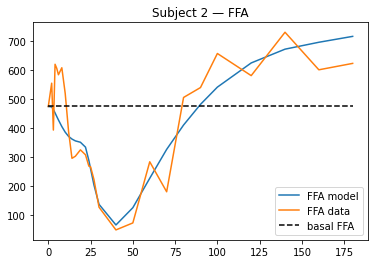

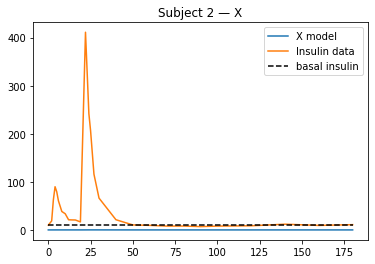

Final parameter matrix (n×5):
 [[1.73854486e-04 6.68427199e-05 8.72315816e+00 2.05645091e-01
  2.86000000e+02]
 [1.87896469e-04 7.08093932e-05 1.38615190e+01 1.45637264e-01
  4.74000000e+02]]
Saved to paraoptmFX2D.csv


In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate, integrate, optimize

micro_ = 1e3

def load_subjects(csv_path='StefanovskiSameT.csv'):
    """Read CSV and return dict: subject_id → array([t, glu, ins, ffa])."""
    subjects = {}
    subj_id = 0
    tim = glu = ins = ffa = None

    with open(csv_path, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for i_row, row in enumerate(reader):
            if i_row == 0:  # skip header
                continue
            sid = int(row[0])
            if sid != subj_id:
                if subj_id > 0:
                    subjects[subj_id] = np.array([
                        tim.copy(), glu.copy(),
                        ins.copy(), ffa.copy()
                    ])
                subj_id = sid
                tim, glu, ins, ffa = [], [], [], []
            tim.append(float(row[1]))
            glu.append(float(row[2]))
            ins.append(float(row[3]))
            ffa.append(micro_ * float(row[4]))
        # save last subject
        if subj_id > 0:
            subjects[subj_id] = np.array([
                tim.copy(), glu.copy(),
                ins.copy(), ffa.copy()
            ])
    return subjects

def rhs_ffa(params, glu_, ins_, fb, ib):
    """Return derivative function [dFFA/dt, dX/dt] for given params."""
    Sfal, Pxa, Sffb, PXFCR = params
    def deriv(t0, y):
        ffa_, x_ = y
        return [
            -Sfal * glu_(t0) * ffa_ + Sffb - fb * x_,
             Pxa * (ins_(t0) - ib)    - PXFCR * x_
        ]
    return deriv

def plot_subj(subj_id, params, subjects):
    """Plot model vs. data for one subject."""
    t, glu, ins, ffa = subjects[subj_id]
    glu_ = interpolate.interp1d(t, glu, kind='linear', fill_value='extrapolate')
    ins_ = interpolate.interp1d(t, ins, kind='linear', fill_value='extrapolate')
    ffa0, ins0 = ffa[0], ins[0]

    sol = integrate.solve_ivp(
        rhs_ffa(np.abs(params), glu_, ins_, ffa0, ins0),
        [t[0], t[-1]], [ffa0, 0.0],
        t_eval=t,
        method='LSODA',
        atol=1e-12, rtol=1e-12
    ).y

    # FFA
    plt.figure()
    plt.plot(t, sol[0], label='FFA model')
    plt.plot(t, ffa,    label='FFA data')
    plt.hlines(ffa0, t[0], t[-1], 'k', ls='--', label='basal FFA')
    plt.title(f'Subject {subj_id} — FFA')
    plt.legend()
    plt.show()

    # X
    plt.figure()
    plt.plot(t, sol[1], label='X model')
    plt.plot(t, ins,    label='Insulin data')
    plt.hlines(ins0, t[0], t[-1], 'k', ls='--', label='basal insulin')
    plt.title(f'Subject {subj_id} — X')
    plt.legend()
    plt.show()

def optimize_subj(subj_id, subjects):
    """
    Optimize [Sfal, Pxa, Sffb, PXFCR] via Nelder–Mead,
    using the user-specified cost function with penalty,
    and printing the 5-vector at each iteration.
    """
    t, glu, ins, ffa = subjects[subj_id]
    glu_ = interpolate.interp1d(t, glu, kind='linear', fill_value='extrapolate')
    ins_ = interpolate.interp1d(t, ins, kind='linear', fill_value='extrapolate')
    ffa0, ins0 = ffa[0], ins[0]

    # mask for t > 0
    time_pts_used = t > 0

    # user-provided normalization
    norm_ffa = np.mean((
        ffa[time_pts_used][:-1]
        - ffa[time_pts_used][1:]
    )**2)

    # user-provided start
    start_par = np.array([0.002, 0.000034, 0.02 * ffa0, 0.06])

    def cost_(params_):
        params = np.abs(params_)
        x_init = np.array([ffa0, 0.0])
        ffa_deriv = rhs_ffa(params, glu_, ins_, ffa0, ins0)
        Z = integrate.solve_ivp(
            ffa_deriv,
            [t[0], t[-1]],
            x_init,
            t_eval=t,
            method='LSODA',
            atol=1e-12, rtol=1e-12
        ).y
        # drop the initial point
        ffa_int = Z[0, 1:]
        mf = -min(ffa_int)
        penalty = np.exp(10 * mf)
        print(f"  mf={mf:.3e}, penalty={penalty:.3e}")
        cost_val = penalty + np.mean(
            (ffa_int - ffa[time_pts_used])**2
        ) / norm_ffa
        return cost_val

    # callback to print the full 5-vector each iteration
    def iter_cb(xk):
        params5 = np.append(np.abs(xk), ffa0)
        print(f"Iter {iter_cb.count:3d} → [Sfal, Pxa, Sffb, PXFCR, basal_FFA] = {params5}")
        iter_cb.count += 1
    iter_cb.count = 1

    res = optimize.minimize(
        cost_,
        start_par,
        method='Nelder-Mead',
        callback=iter_cb,
        options={'maxiter': 500}
    )
    res.x = np.abs(res.x)
    print(f"Subject {subj_id} final cost={res.fun:.3e}, params={res.x}\n")
    return res

def run_optimization(subject_ids, subjects, save_path='paraoptmFX2D.csv'):
    """
    Run optimization & plotting for each subject in subject_ids,
    then collect and save a (n×5) array:
      [Sfal, Pxa, Sffb, PXFCR, basal_FFA].
    """
    results = []
    for sid in subject_ids:
        if sid not in subjects:
            print(f"Subject {sid} not found—skipping.")
            continue
        res = optimize_subj(sid, subjects)
        plot_subj(sid, res.x, subjects)
        results.append((res.x, subjects[sid][3, 0]))

    paraoptm = np.vstack([
        np.append(p, b) for p, b in results
    ])
    print("Final parameter matrix (n×5):\n", paraoptm)
    np.savetxt(save_path, paraoptm, delimiter=',')
    print(f"Saved to {save_path}")
    return paraoptm

# ------------------------------
# Example in Jupyter Notebook:
# ------------------------------
subjects = load_subjects('StefanovskiSameT.csv')

# To optimize only subjects 1 and 2:
para_1_2 = run_optimization([1, 2], subjects)

# # To optimize all subjects (e.g. 1–25):
# para_all = run_optimization(sorted(subjects.keys()), subjects)
